In [157]:
import torch
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary

import time

In [158]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize(224), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


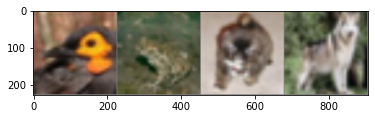

In [159]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

In [160]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape

torch.Size([4, 3, 224, 224])

In [161]:
class VGG(torch.nn.Module):
    def __init__(self):
        super(VGG, self).__init__()
        self.layer1 = torch.nn.Conv2d(3, 64, 3, stride=1, padding=1)
        self.relu1 = torch.nn.ReLU(inplace=True)
        self.layer2 = torch.nn.Conv2d(64, 128, 3, stride=1, padding=1)
        self.relu2 = torch.nn.ReLU(inplace=True)
        self.maxpooling1 = torch.nn.MaxPool2d(2, stride=2)
        
        self.layer3 = torch.nn.Conv2d(128, 256, 3, stride=1, padding=1)
        self.relu3 = torch.nn.ReLU(inplace=True)
        self.layer4 = torch.nn.Conv2d(256, 256, 3, stride=1, padding=1)
        self.relu4 = torch.nn.ReLU(inplace=True)
        self.maxpooling2 = torch.nn.MaxPool2d(2, stride=2)

        self.layer5 = torch.nn.Conv2d(256, 512, 3, stride=1, padding=1)
        self.relu5 = torch.nn.ReLU(inplace=True)
        self.layer6 = torch.nn.Conv2d(512, 512, 3, stride=1, padding=1)
        self.relu6 = torch.nn.ReLU(inplace=True)
        self.layer7 = torch.nn.Conv2d(512, 512, 3, stride=1, padding=1)
        self.relu7 = torch.nn.ReLU(inplace=True)
        self.maxpooling3 = torch.nn.MaxPool2d(2, stride=2)

        self.layer8 = torch.nn.Conv2d(512, 512, 3, stride=1, padding=1)
        self.relu8 = torch.nn.ReLU(inplace=True)
        self.layer9 = torch.nn.Conv2d(512, 512, 3, stride=1, padding=1)
        self.relu9 = torch.nn.ReLU(inplace=True)
        self.layer10 = torch.nn.Conv2d(512, 512, 3, stride=1, padding=1)
        self.relu10 = torch.nn.ReLU(inplace=True)
        self.maxpooling4 = torch.nn.MaxPool2d(2, stride=2)

        self.layer11 = torch.nn.Conv2d(512, 512, 3, stride=1, padding=1)
        self.relu11 = torch.nn.ReLU(inplace=True)
        self.layer12 = torch.nn.Conv2d(512, 512, 3, stride=1, padding=1)
        self.relu12 = torch.nn.ReLU(inplace=True)
        self.layer13 = torch.nn.Conv2d(512, 512, 3, stride=1, padding=1)
        self.relu13 = torch.nn.ReLU(inplace=True)
        self.maxpooling5 = torch.nn.MaxPool2d(2, stride=2)
        
        self.linear1 = torch.nn.Linear(512 * 7 * 7, 4096)
        self.linear2 = torch.nn.Linear(4096, 4096)
        self.linear3 = torch.nn.Linear(4096, 1000)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.maxpooling1(x)
        
        x = self.layer3(x)
        x = self.relu3(x)
        x = self.layer4(x)
        x = self.relu4(x)
        x = self.maxpooling2(x)
        
        x = self.layer5(x)
        x = self.relu5(x)
        x = self.layer6(x)
        x = self.relu6(x)
        x = self.layer7(x)
        x = self.relu7(x)
        x = self.maxpooling3(x)
        
        x = self.layer8(x)
        x = self.relu8(x)
        x = self.layer9(x)
        x = self.relu9(x)
        x = self.layer10(x)
        x = self.relu10(x)
        x = self.maxpooling4(x)
        
        x = self.layer11(x)
        x = self.relu11(x)
        x = self.layer12(x)
        x = self.relu12(x)
        x = self.layer13(x)
        x = self.relu13(x)
        x = self.maxpooling5(x)
        
        x = torch.flatten(x, 1)
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.linear3(x)
        return x

In [166]:
model = VGG().cuda()
classes =  ('airplance', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck')

criterion = torch.nn.CrossEntropyLoss().cuda()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

cur_time = time.time()
for epoch in range(10):
    total_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        if i % 50 == 0:
            print ('[{}, {}] loss: {}'.format(epoch+1, i+1, total_loss / 50))
            total_loss = 0.0
print (time.time() - cur_time)

[1, 1] loss: 0.13828178405761718
[1, 51] loss: 5.805959196090698
[1, 101] loss: 2.602095022201538
[1, 151] loss: 2.4609582805633545
[1, 201] loss: 2.4077648758888244
[1, 251] loss: 2.3975942945480346
[1, 301] loss: 2.3604968857765196
[1, 351] loss: 2.394247055053711
[1, 401] loss: 2.401941862106323
[1, 451] loss: 2.3327509999275207
[1, 501] loss: 2.3837557935714724
[1, 551] loss: 2.365395884513855
[1, 601] loss: 2.376487193107605
[1, 651] loss: 2.344799482822418
[1, 701] loss: 2.3600934600830077
[1, 751] loss: 2.3612426328659057
[1, 801] loss: 2.380865898132324
[1, 851] loss: 2.334163074493408
[1, 901] loss: 2.355037603378296
[1, 951] loss: 2.3516400384902956
[1, 1001] loss: 2.349041018486023
[1, 1051] loss: 2.347507576942444
[1, 1101] loss: 2.3490581464767457
[1, 1151] loss: 2.3278478240966796
[1, 1201] loss: 2.3533711528778074
[1, 1251] loss: 2.3291402196884157
[1, 1301] loss: 2.331428050994873
[1, 1351] loss: 2.354162907600403
[1, 1401] loss: 2.324823327064514
[1, 1451] loss: 2.3402

[1, 11851] loss: 1.424800182580948
[1, 11901] loss: 1.664390026330948
[1, 11951] loss: 1.467863790988922
[1, 12001] loss: 1.4963621759414674
[1, 12051] loss: 1.424950737953186
[1, 12101] loss: 1.5187302041053772
[1, 12151] loss: 1.60050483584404
[1, 12201] loss: 1.4636152374744416
[1, 12251] loss: 1.5187671446800233
[1, 12301] loss: 1.397566020488739
[1, 12351] loss: 1.4648960208892823
[1, 12401] loss: 1.5298384070396422
[1, 12451] loss: 1.5011054754257203
[2, 1] loss: 0.02872436761856079
[2, 51] loss: 1.3957030415534972
[2, 101] loss: 1.492318526506424
[2, 151] loss: 1.431794857978821
[2, 201] loss: 1.4888067239522933
[2, 251] loss: 1.5700965893268586
[2, 301] loss: 1.4351300477981568
[2, 351] loss: 1.3844602990150452
[2, 401] loss: 1.4434580671787263
[2, 451] loss: 1.4093461060523986
[2, 501] loss: 1.4859222316741942
[2, 551] loss: 1.30464372754097
[2, 601] loss: 1.5290998435020446
[2, 651] loss: 1.5645524203777312
[2, 701] loss: 1.4187788736820222
[2, 751] loss: 1.3903440088033676
[

[2, 11151] loss: 1.0268474924564361
[2, 11201] loss: 1.0892860889434814
[2, 11251] loss: 0.980356924533844
[2, 11301] loss: 1.1375311341881753
[2, 11351] loss: 1.092283269762993
[2, 11401] loss: 1.0338204100728035
[2, 11451] loss: 1.081625063419342
[2, 11501] loss: 0.9183059644699096
[2, 11551] loss: 1.0299385088682174
[2, 11601] loss: 0.9566805654764176
[2, 11651] loss: 0.997146680355072
[2, 11701] loss: 1.0755406880378724
[2, 11751] loss: 0.9755402964353561
[2, 11801] loss: 1.0879735070466996
[2, 11851] loss: 1.0647691690921783
[2, 11901] loss: 1.0746365356445313
[2, 11951] loss: 0.8647341698408126
[2, 12001] loss: 0.9936146289110184
[2, 12051] loss: 0.979242531657219
[2, 12101] loss: 1.072733137011528
[2, 12151] loss: 1.243279627263546
[2, 12201] loss: 1.081523410230875
[2, 12251] loss: 0.9305393767356872
[2, 12301] loss: 1.161365311741829
[2, 12351] loss: 0.9347673179209233
[2, 12401] loss: 0.8582139047980308
[2, 12451] loss: 1.0156732280552387
[3, 1] loss: 0.003395873308181763
[3,

[3, 10401] loss: 0.889209033176303
[3, 10451] loss: 0.7555388751626014
[3, 10501] loss: 0.8624912789463997
[3, 10551] loss: 0.9267233371734619
[3, 10601] loss: 0.8310600177943707
[3, 10651] loss: 0.7333144162595272
[3, 10701] loss: 0.7833708212524653
[3, 10751] loss: 0.8402123653888702
[3, 10801] loss: 0.8094722171127796
[3, 10851] loss: 0.8718474477529525
[3, 10901] loss: 0.750340368449688
[3, 10951] loss: 0.8772174350172282
[3, 11001] loss: 0.7278445428609848
[3, 11051] loss: 0.8635793321579694
[3, 11101] loss: 0.657856921069324
[3, 11151] loss: 0.7372587142884731
[3, 11201] loss: 0.8549545475840569
[3, 11251] loss: 0.8321792950481176
[3, 11301] loss: 0.7588829305768013
[3, 11351] loss: 0.8049558113515377
[3, 11401] loss: 0.8478039345145225
[3, 11451] loss: 0.7187878431379795
[3, 11501] loss: 0.8050207775831223
[3, 11551] loss: 0.8738800260424614
[3, 11601] loss: 0.8518731282651424
[3, 11651] loss: 0.8181647157669067
[3, 11701] loss: 0.7987422987818718
[3, 11751] loss: 0.871662916392

[4, 9651] loss: 0.5615321324765682
[4, 9701] loss: 0.7056204639328644
[4, 9751] loss: 0.5528816528618336
[4, 9801] loss: 0.6639232033491135
[4, 9851] loss: 0.5962516855075956
[4, 9901] loss: 0.655281240567565
[4, 9951] loss: 0.6106310599297285
[4, 10001] loss: 0.45779276790097356
[4, 10051] loss: 0.6174434488452971
[4, 10101] loss: 0.684153302013874
[4, 10151] loss: 0.5457078358530998
[4, 10201] loss: 0.7626519628241658
[4, 10251] loss: 0.6490250359196216
[4, 10301] loss: 0.5780583472549915
[4, 10351] loss: 0.6647476528584957
[4, 10401] loss: 0.5855867923423648
[4, 10451] loss: 0.591684520021081
[4, 10501] loss: 0.5856383671145886
[4, 10551] loss: 0.7534918601810933
[4, 10601] loss: 0.6917999727651477
[4, 10651] loss: 0.7437028324604035
[4, 10701] loss: 0.6079029828123749
[4, 10751] loss: 0.6185982136055828
[4, 10801] loss: 0.6586573411896824
[4, 10851] loss: 0.5994406518340111
[4, 10901] loss: 0.7400857212021947
[4, 10951] loss: 0.7153579998202622
[4, 11001] loss: 0.5700779973715544
[

[5, 8801] loss: 0.592749923770316
[5, 8851] loss: 0.4773556613735855
[5, 8901] loss: 0.49977705247700216
[5, 8951] loss: 0.5956207256764173
[5, 9001] loss: 0.45197080695070324
[5, 9051] loss: 0.555277569964528
[5, 9101] loss: 0.44762585882097483
[5, 9151] loss: 0.450493866186589
[5, 9201] loss: 0.515205709906295
[5, 9251] loss: 0.5797962643951178
[5, 9301] loss: 0.5401339701889083
[5, 9351] loss: 0.5505460198223591
[5, 9401] loss: 0.5497822313010693
[5, 9451] loss: 0.4887937489897013
[5, 9501] loss: 0.43745154719799756
[5, 9551] loss: 0.5897160167247057
[5, 9601] loss: 0.5020256052538753
[5, 9651] loss: 0.49098366053774956
[5, 9701] loss: 0.5008457282930613
[5, 9751] loss: 0.3981821399368346
[5, 9801] loss: 0.5104255564510822
[5, 9851] loss: 0.4954726546443999
[5, 9901] loss: 0.5846506533958018
[5, 9951] loss: 0.42496275370474906
[5, 10001] loss: 0.5076385746896267
[5, 10051] loss: 0.5706122339144349
[5, 10101] loss: 0.4961556181311607
[5, 10151] loss: 0.5800954693299718
[5, 10201] los

[6, 7901] loss: 0.3802068336168304
[6, 7951] loss: 0.42573096910491587
[6, 8001] loss: 0.3991814614459872
[6, 8051] loss: 0.4872060750424862
[6, 8101] loss: 0.3884289184422232
[6, 8151] loss: 0.3923344054305926
[6, 8201] loss: 0.2857219667173922
[6, 8251] loss: 0.4368968891422264
[6, 8301] loss: 0.35654696710407735
[6, 8351] loss: 0.3893269859999418
[6, 8401] loss: 0.35036303524975665
[6, 8451] loss: 0.33589191230712456
[6, 8501] loss: 0.4565747907711193
[6, 8551] loss: 0.48834865166805685
[6, 8601] loss: 0.37298327885568144
[6, 8651] loss: 0.293906804677099
[6, 8701] loss: 0.3317106730490923
[6, 8751] loss: 0.45396706810221077
[6, 8801] loss: 0.3606475730543025
[6, 8851] loss: 0.3691212964197621
[6, 8901] loss: 0.35325668248347936
[6, 8951] loss: 0.2571989340428263
[6, 9001] loss: 0.43038563107373196
[6, 9051] loss: 0.40306627557612956
[6, 9101] loss: 0.31740993802435696
[6, 9151] loss: 0.38626911089755595
[6, 9201] loss: 0.3500687658414245
[6, 9251] loss: 0.33043147628195585
[6, 9301

[7, 6901] loss: 0.17017908076872118
[7, 6951] loss: 0.2536528568447102
[7, 7001] loss: 0.2688075713813305
[7, 7051] loss: 0.2018767292238772
[7, 7101] loss: 0.2983206488122232
[7, 7151] loss: 0.19265439804992637
[7, 7201] loss: 0.2312184989580419
[7, 7251] loss: 0.2554095336003229
[7, 7301] loss: 0.18963363946415485
[7, 7351] loss: 0.18576736300718039
[7, 7401] loss: 0.28059657485457135
[7, 7451] loss: 0.18265380286902655
[7, 7501] loss: 0.1919444546365412
[7, 7551] loss: 0.1725786481727846
[7, 7601] loss: 0.3339753439091146
[7, 7651] loss: 0.28367513278732076
[7, 7701] loss: 0.22811421378748492
[7, 7751] loss: 0.25880333029374014
[7, 7801] loss: 0.2716762142861262
[7, 7851] loss: 0.1813686477765441
[7, 7901] loss: 0.21092829299377627
[7, 7951] loss: 0.19543518925580428
[7, 8001] loss: 0.21826329728821292
[7, 8051] loss: 0.1598848122842628
[7, 8101] loss: 0.30784691545064563
[7, 8151] loss: 0.1777178935566917
[7, 8201] loss: 0.2961524175398517
[7, 8251] loss: 0.26770917870460836
[7, 83

[8, 5851] loss: 0.18730242347650347
[8, 5901] loss: 0.13747644805876916
[8, 5951] loss: 0.09979060278514225
[8, 6001] loss: 0.12728332984082727
[8, 6051] loss: 0.1736269843376067
[8, 6101] loss: 0.19318464190408122
[8, 6151] loss: 0.12316851849696149
[8, 6201] loss: 0.16397242622249905
[8, 6251] loss: 0.07534676136768667
[8, 6301] loss: 0.17172729310099386
[8, 6351] loss: 0.07394435300142504
[8, 6401] loss: 0.129262480905158
[8, 6451] loss: 0.22289660319162066
[8, 6501] loss: 0.13789096226374795
[8, 6551] loss: 0.20464637095647048
[8, 6601] loss: 0.10855262726661068
[8, 6651] loss: 0.18124279904339347
[8, 6701] loss: 0.16964486728247435
[8, 6751] loss: 0.17476005357457325
[8, 6801] loss: 0.129163194215198
[8, 6851] loss: 0.11737492956453935
[8, 6901] loss: 0.1250405778067943
[8, 6951] loss: 0.18118680576444604
[8, 7001] loss: 0.14505146540686836
[8, 7051] loss: 0.10641181070546736
[8, 7101] loss: 0.09636594097979241
[8, 7151] loss: 0.2028400123148458
[8, 7201] loss: 0.12107899773691315

[9, 4751] loss: 0.09820729151695559
[9, 4801] loss: 0.09231106100053921
[9, 4851] loss: 0.04872376089429963
[9, 4901] loss: 0.16488047390305838
[9, 4951] loss: 0.11964248838106868
[9, 5001] loss: 0.12954360646399438
[9, 5051] loss: 0.15940680121693732
[9, 5101] loss: 0.10949281700457504
[9, 5151] loss: 0.1633247669874254
[9, 5201] loss: 0.1254999038087408
[9, 5251] loss: 0.1389510920974135
[9, 5301] loss: 0.1620644943372463
[9, 5351] loss: 0.14243005623524368
[9, 5401] loss: 0.08310745730781491
[9, 5451] loss: 0.1720926148936269
[9, 5501] loss: 0.12831781549582957
[9, 5551] loss: 0.13586261106262099
[9, 5601] loss: 0.12196652192133114
[9, 5651] loss: 0.1274010242096847
[9, 5701] loss: 0.1140531243760779
[9, 5751] loss: 0.13288008519964933
[9, 5801] loss: 0.0742508048477248
[9, 5851] loss: 0.053780042241735375
[9, 5901] loss: 0.1377663868108175
[9, 5951] loss: 0.0718551094616123
[9, 6001] loss: 0.09959673293996843
[9, 6051] loss: 0.07276263059931808
[9, 6101] loss: 0.09339868839189876
[

[10, 3551] loss: 0.06357453580027767
[10, 3601] loss: 0.1022363907080944
[10, 3651] loss: 0.045742007835758616
[10, 3701] loss: 0.11616744093308626
[10, 3751] loss: 0.08857477327306697
[10, 3801] loss: 0.05640585648405249
[10, 3851] loss: 0.058563272999294896
[10, 3901] loss: 0.038259838610626956
[10, 3951] loss: 0.06446039626018318
[10, 4001] loss: 0.10286227066426364
[10, 4051] loss: 0.0682326346158652
[10, 4101] loss: 0.07004960936842167
[10, 4151] loss: 0.1344188152300899
[10, 4201] loss: 0.07137654180362006
[10, 4251] loss: 0.12366189107473474
[10, 4301] loss: 0.09884672208067055
[10, 4351] loss: 0.07836141728214897
[10, 4401] loss: 0.12509634645968618
[10, 4451] loss: 0.15582728797189702
[10, 4501] loss: 0.08139288839621259
[10, 4551] loss: 0.10637078913647201
[10, 4601] loss: 0.06896520064994548
[10, 4651] loss: 0.12396987902524416
[10, 4701] loss: 0.1290495660157467
[10, 4751] loss: 0.072738652639473
[10, 4801] loss: 0.0812417392315183
[10, 4851] loss: 0.09611212277715822
[10, 

In [169]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(10):
    print('Accuracy of {} : {}'.format(classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of airplance : 99.12
Accuracy of bird : 97.84
Accuracy of car : 97.3
Accuracy of cat : 97.94
Accuracy of deer : 98.94
Accuracy of dog : 93.7
Accuracy of horse : 99.1
Accuracy of monkey : 99.64
Accuracy of ship : 99.48
Accuracy of truck : 98.34
